<a href="https://colab.research.google.com/github/CharlyMech/IEDIB_CEIA_2024-25/blob/main/Sistemas%20de%20BigData/Bloque%205/Actividades/5.1/CE_5074_5_1_Section_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datashader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.4 MB/s eta 0:00:00


In [3]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [4]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt

df = pd.read_csv('https://opendata-ajuntament.barcelona.cat/data/dataset/27b3f8a7-e536-4eea-b025-ce094817b2bd/resource/23124fd5-521f-40f8-85b8-efb1e71c2ec8/download', sep=',')
df.head()

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 272, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


,codi,x_etrs89,y_etrs89,latitud,longitud,tipus_element,espai_verd,adreca,cat_especie_id,cat_nom_cientific,...,categoria_arbrat,data_plantacio,tipus_aigua,tipus_reg,geom,catalogacio,codi_barri,nom_barri,codi_districte,nom_districte
0,0000025AR,430270.562,4587637.998,41.437287,2.165353,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430270.561661092 4587637.99844993),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
1,0000028AR,430278.453,4587643.703,41.437339,2.165447,ARBRE VIARI,"Central de Nou Barris, Parc","Pg Fabra i Puig, 450",2336,Fraxinus angustifolia 'Raywood',...,PRIMERA,2022-02-15,NaN,GOTEIG AVARIAT,POINT (430278.452565526 4587643.70285161),NaN,48.0,LA GUINEUETA,8.0,NOU BARRIS
2,0000386AR,430035.239,4587693.836,41.437769,2.162530,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430035.238676006 4587693.83631125),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
3,0000387AR,430032.831,4587696.005,41.437788,2.162501,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430032.831137134 4587696.00500337),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ
4,0000388AR,430030.367,4587698.393,41.437810,2.162471,ARBRE VIARI,"Central de Nou Barris, Parc","C\ Doctor Letamendi, 90",126,Platanus × acerifolia,...,SEGONA,NaN,NaN,SENSE INFORMAR,POINT (430030.366746935 4587698.39336605),NaN,43.0,HORTA,7.0,HORTA - GUINARDÓ


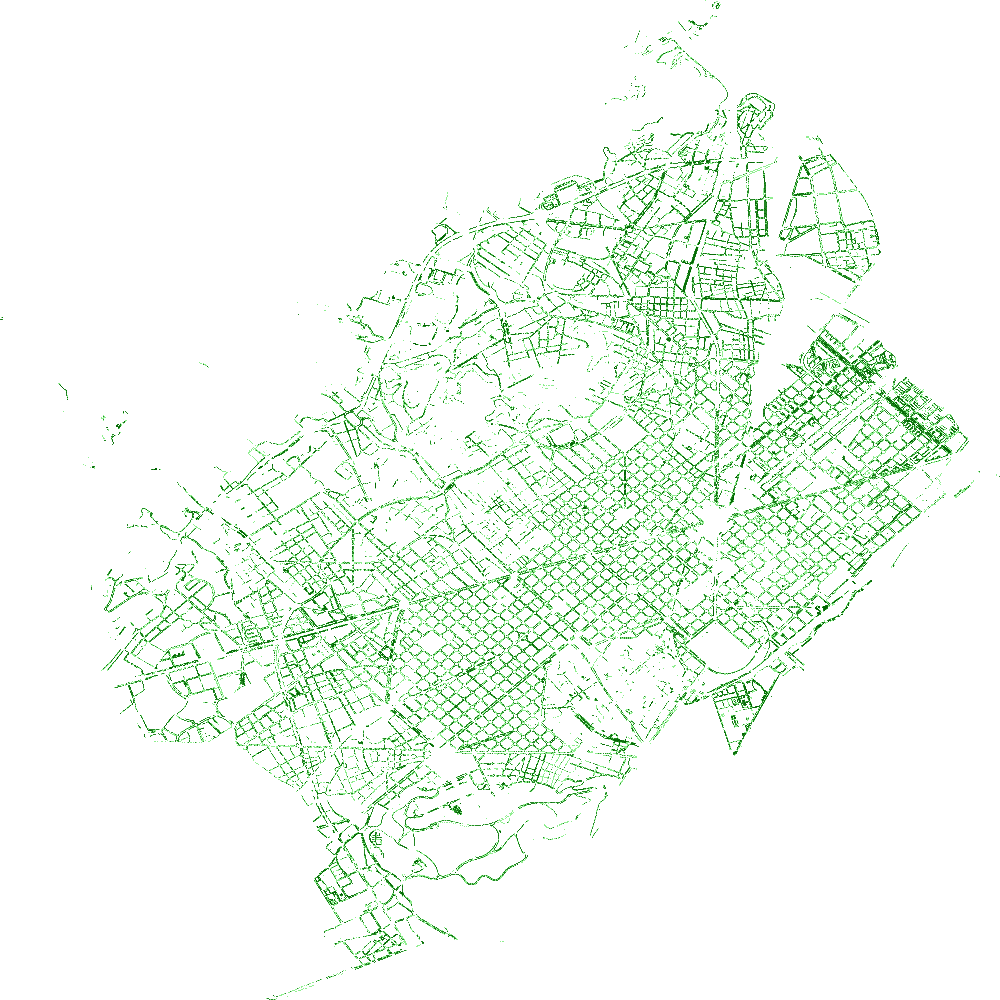

In [9]:
cvs = ds.Canvas(
    x_range=(df['x_etrs89'].min(), df['x_etrs89'].max()),
    y_range=(df['y_etrs89'].min(), df['y_etrs89'].max()),
    plot_width=1000,
    plot_height=1000
)
agg = cvs.points(df, 'x_etrs89', 'y_etrs89')
img = tf.shade(agg, cmap=['lightgreen', 'darkgreen'], how='eq_hist')
img

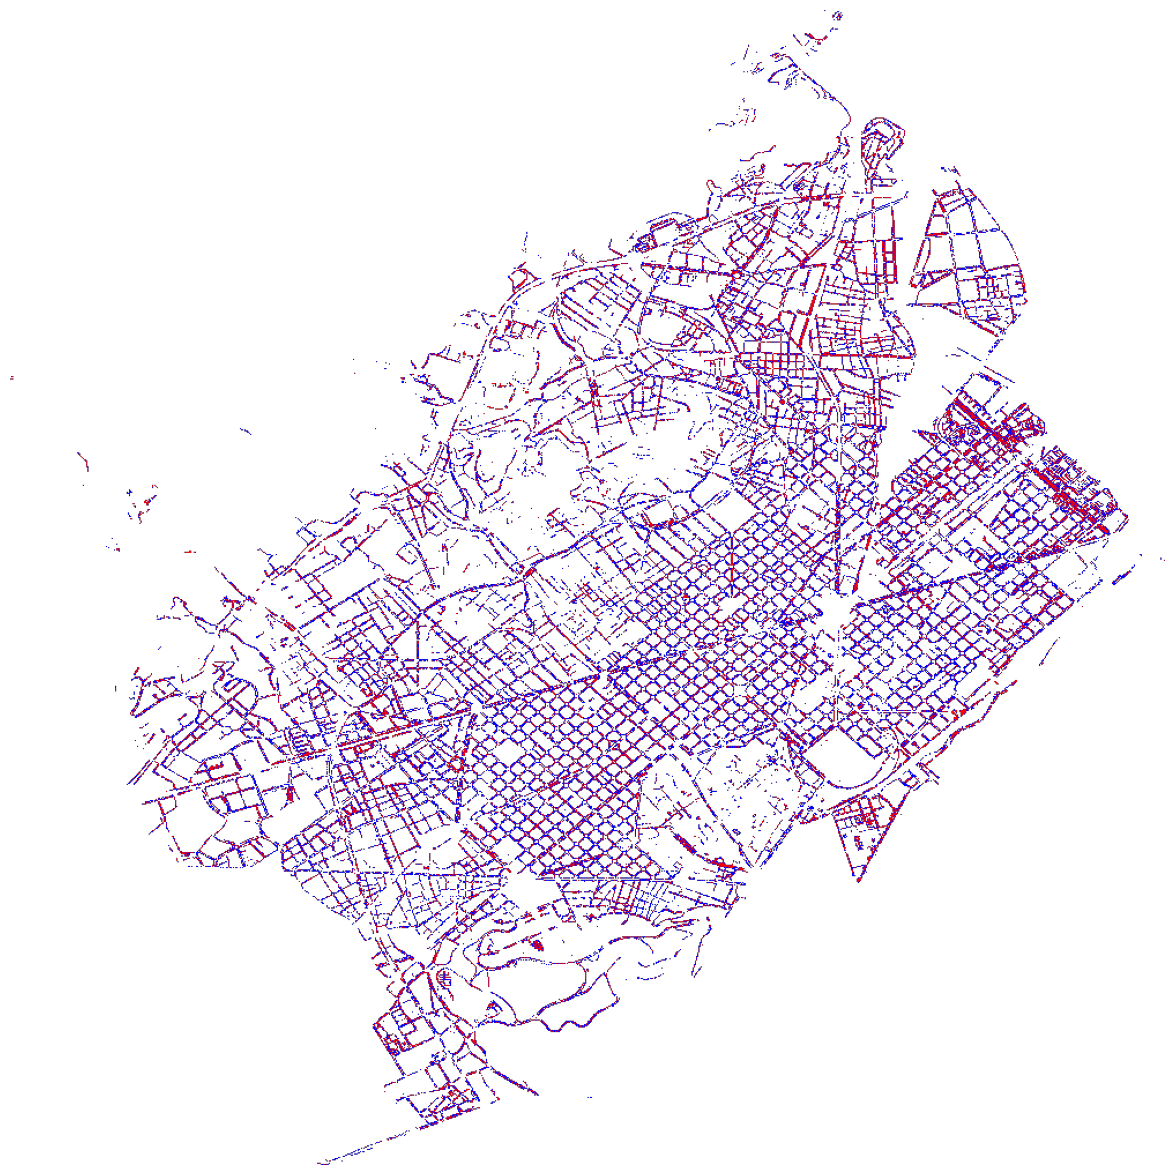

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(img.to_pil())
plt.axis('off')
plt.show()